# Salary Classification using XGBoost

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 
              'race','sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [35]:
df=train_set

In [36]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [38]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


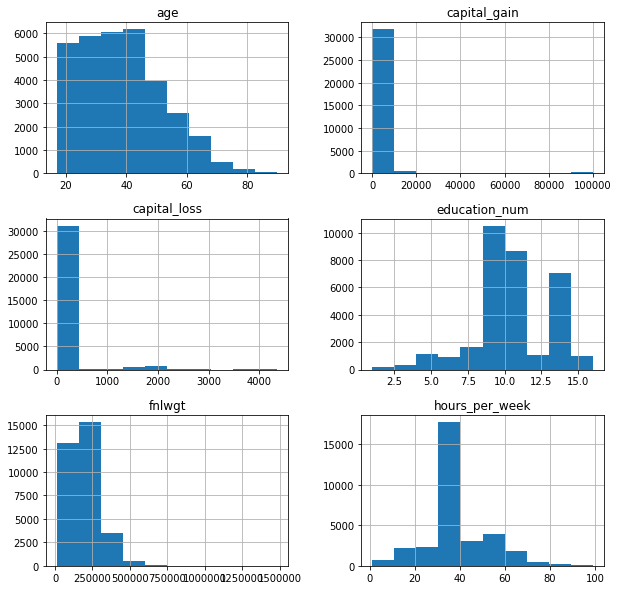

In [40]:
df.hist(figsize=(10,10))
plt.show()

In [41]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [42]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [43]:
for feature in col_labels:
    if df[feature].dtype=='object':
        print('_'*10,feature,'_'*10)
        print(df[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

In [44]:
#features Native_counrty, Occupation, workclass have '?' as one value 


In [45]:
df.shape

(32561, 15)

In [46]:
index1=df[df['native_country']==' ?'].index
df=df.drop(index1)
index2=df[df["occupation"]== ' ?'].index
df=df.drop(index2)
index3=df[df['workclass']==' ?'].index
df=df.drop(index3)
print(index1.shape,index2.shape,index3.shape)

(583,) (1816,) (0,)


In [47]:
#records with '?' are removed
df.shape

(30162, 15)

In [48]:
for feature in col_labels:
    if df[feature].dtype=='object':
        print('_'*10,feature,'_'*10)
        print(df[feature].value_counts())


__________ workclass __________
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
__________ education __________
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital_status, dtype: int64
__________ occupation __________
 Prof-

In [49]:
#converting the categorical variables using one hot encoding
df1=df.copy()
objfeature=[]
for feature in col_labels:
    if (df1[feature].dtypes=='object'):
        objfeature.append(feature)
print(objfeature)

df1=pd.get_dummies(df[objfeature[:-1]])

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'wage_class']


In [50]:
intfeature=[]
for feature in col_labels:
    if(df[feature].dtypes=='int64'):
        intfeature.append(feature)
print(intfeature)
df2=df[intfeature]

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [51]:
print(df1.shape)
print(df2.shape)

(30162, 98)
(30162, 6)


In [52]:
x_t=pd.concat([df1,df2],axis=1)
x_t.shape

(30162, 104)

In [53]:
y=df[objfeature[-1]]
print(y.shape)
y.head()

(30162,)


0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: wage_class, dtype: object

In [54]:
#converting the y_train categories into numerical using lable encoding
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y_t=le.fit_transform(y)
print(y_t.shape)
y_t


(30162,)


array([0, 0, 0, ..., 0, 0, 1])

In [55]:
from xgboost import XGBClassifier

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y_t,test_size=0.3,random_state=43)

In [58]:
model=XGBClassifier(objective='binary:logistic')
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8694883412531772

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [65]:
grid=GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid,verbose=3)

In [66]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[19:11:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.854, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[19:11:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.851, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[19:11:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.841, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[19:11:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.848, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[19:11:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.863, total=   2.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=200 .................
[19:12:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.868, total=   2.3s
[CV]  learning_rate=1, max_depth=5, n_estimators=10 ..................
[19:12:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=1, max_depth=5, n_estimators=100, score=0.866, total=   2.3s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 .................
[19:12:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=0.867, total=   4.4s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 .................
[19:12:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.857, total=   4.0s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[19:13:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.860, total=   4.0s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[19:13:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.859, total=   4.0s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[19:14:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.851, total=   4.0s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[19:14:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=0.841, total=   0.3s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[19:16:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=0.848, total=   0.3s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[19:16:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.858, total=   3.0s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[19:16:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.863, total=   2.8s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[19:16:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.859, total=   2.3s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[19:17:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.861, total=   2.3s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[19:17:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=10, n_estimators=50, score=0.856, total=   2.1s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50 ...............
[19:17:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=10, n_estimators=50, score=0.852, total=   2.2s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50 ...............
[19:17:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=20, n_estimators=10, score=0.855, total=   1.0s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[19:18:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=10, score=0.844, total=   1.0s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[19:18:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.841, total=  15.9s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[19:20:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.841, total=  15.2s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[19:20:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.860, total=   1.5s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[19:21:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.860, total=   1.5s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[19:21:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.858, total=   1.2s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[19:21:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.860, total=   1.2s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[19:21:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.1, max_depth=10, n_estimators=10, score=0.857, total=   0.6s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10 ...............
[19:22:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=10, score=0.858, total=   0.6s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10 ...............
[19:22:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.852, total=   8.0s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[19:23:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.844, total=   7.9s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[19:23:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.849, total=   7.9s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100 ..............
[19:24:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.843, total=   8.0s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100 ..............
[19:24:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=0.860, total=   0.8s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[19:25:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=0.857, total=   0.9s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[19:26:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.851, total=   0.4s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[19:26:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.850, total=   0.4s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[19:26:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.860, total=   4.2s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[19:26:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.857, total=   4.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[19:26:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.857, total=   4.0s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[19:27:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.849, total=   4.2s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[19:27:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.01, max_depth=20, n_estimators=50, score=0.851, total=   4.1s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50 ..............
[19:28:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=20, n_estimators=50, score=0.842, total=   4.0s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50 ..............
[19:28:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.841, total=   0.3s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[19:30:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.848, total=   0.3s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[19:30:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.858, total=   2.7s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[19:30:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.863, total=   2.7s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[19:30:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.859, total=   2.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[19:31:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.861, total=   2.2s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[19:31:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=10, n_estimators=50, score=0.856, total=   2.1s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50 .............
[19:31:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=10, n_estimators=50, score=0.852, total=   2.1s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50 .............
[19:31:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.855, total=   0.9s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[19:32:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.844, total=   0.9s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[19:32:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.841, total=  15.5s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[19:34:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.841, total=  15.7s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[19:34:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 23.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [67]:
best_params=grid.best_params_
model=XGBClassifier(objective='binary:logistic',**best_params)
model.fit(x_train,y_train)

[19:35:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier( learning_rate=1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy
#accuracy has improved

0.8702619073930821

In [72]:
from sklearn import metrics
print('Accuracy: ',accuracy)
print('Confusion matrix: ',metrics.confusion_matrix(y_test,y_pred))
print('Report:\n ',metrics.classification_report(y_test,y_pred))

Accuracy:  0.8702619073930821
Confusion matrix:  [[6406  387]
 [ 787 1469]]
Report:
                precision    recall  f1-score   support

           0       0.89      0.94      0.92      6793
           1       0.79      0.65      0.71      2256

    accuracy                           0.87      9049
   macro avg       0.84      0.80      0.82      9049
weighted avg       0.87      0.87      0.87      9049



In [73]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(model,x_t,y_t,scoring='accuracy',cv=10)


[19:37:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used

In [79]:
print('cross validation scores',cross_val)
print('cross validation mean',cross_val.mean())

cross validation scores [0.86277759 0.86874379 0.86969496 0.86604775 0.87367374 0.87201592
 0.86803714 0.88229443 0.87566313 0.86538462]
cross validation mean 0.8704333049940699
